# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\tolga\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


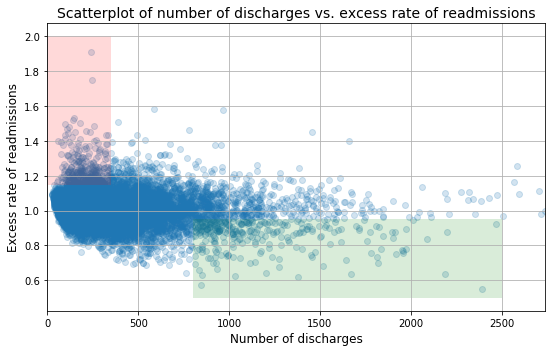

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [14]:
df = clean_hospital_read_df

df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [16]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [17]:
df = df[df['Number of Discharges'] != 0]
df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


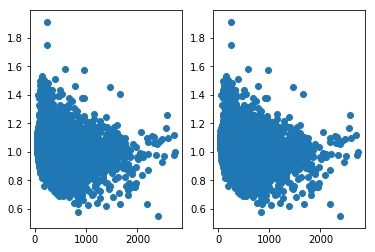

In [18]:
plt.subplot(1,2,1)
plt.scatter(x=df['Number of Discharges'][81:-3], y=df['Excess Readmission Ratio'][81:-3])
plt.subplot(1,2,2)
plt.scatter(x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]], y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3]))
plt.show()

In [19]:
#In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

print('mean excess readmission rate: ', round(df[df['Number of Discharges'] < 100]['Excess Readmission Ratio'].mean(),3))

dftemp = df[df['Number of Discharges'] < 100]
print('have excess readmission rate greater than 1: ',round(dftemp[dftemp['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()/dftemp['Excess Readmission Ratio'].count()*100,0))

mean excess readmission rate:  1.023
have excess readmission rate greater than 1:  63.0


In [20]:
from scipy import stats

stats.pearsonr(x=df['Number of Discharges'], y=df['Excess Readmission Ratio'])

(-0.09739794351079353, 1.222547377680967e-25)

In [21]:
dftemp1 = df[df['Number of Discharges'] >= 800]
dftemp2 = dftemp1[dftemp1['Number of Discharges'] <= 2500]

print('Greenzone ratio is:', round(dftemp2[dftemp2['Excess Readmission Ratio'] <= 0.95]['Excess Readmission Ratio'].count()/dftemp2[dftemp2['Excess Readmission Ratio'] > 0.95]['Excess Readmission Ratio'].count(),3))

Greenzone ratio is: 0.508


In [22]:
dftemp3 = df[df['Number of Discharges'] <= 350]


print('Redzone ratio is:', round(dftemp3[dftemp3['Excess Readmission Ratio'] >= 1.15]['Excess Readmission Ratio'].count()/dftemp3[dftemp3['Excess Readmission Ratio'] < 1.15]['Excess Readmission Ratio'].count(),3))

Redzone ratio is: 0.053


In [23]:
#Bufferzone capacity

dftemp4 = df[df['Excess Readmission Ratio'] > 0.95]
dftemp5 = dftemp4[dftemp4['Excess Readmission Ratio'] < 1.15]['Excess Readmission Ratio'].count()
print('Bufferzone Capacity: ', dftemp5)
print('Bufferzone Rate: ', dftemp5/df['Excess Readmission Ratio'].count())

Bufferzone Capacity:  8124
Bufferzone Rate:  0.7066191180307907


# NOTES ON ANALYSIS ALREADY DONE

## There are 81 hospitals have no discharges and also no readmissions either. This data is irrelevant to the data set.

## There is a -0.097, statistically significant correlation between Number of Discharges and Excess Readmission Ratio.

## Greenzone ratio is 50.8%, there is almost no difference between greenzone and white zone, between greenzone borders.

## Redzone ratio is 5.3%, between redzone borders. Hospitals have capacity below 350.

## If the success is having Excess Readmission Rate lower than 0.95, there shouldn't be any Number of Discharge lower limit, success is success for anysize of hospital. Same goes for failure, if the 1.15 is failure, it is valid for every hospital.

## Red and Greenzone Readmission Rate limits should be redefined. so as success and failure. Buffer zone between upper limit of the Greenzone and lowerlimit of the Redzone has the 70.7% of the data.





# READMISSION ANALYSIS BY __TT__

Number of discharge distribution is highly skewed.

With the CMS limits Overall success rate:  0.24    with breakpoint defined 1 Overall success rate:  0.48
                    Overall failure rate:  0.05                              Overall failure rate:  0.52
                    Overall success ratio:  4.44                             Overall success ratio:  0.93

It seems that by defining the limits CMS could reduce the failure rate and increase success ratio but in reality hospitals generally tend to readmit and not readmitting success ratio is .93

Expected and Predicted Readmission Rates are overlapping, it is almost linear but there is a gap in the linear line. 10%-15% area differs readmission rates and crates two clusters. There is a significant correlation, almost perfect match as predicted.

The gap in the expected ratio scale, will definitely have an effect on ratio and a calculation based on two predicted value will not resemble the truth in the data. Statistic should be changed to a more robust calculation.

The change of statistic will allow more precise red and green zone, ratio.


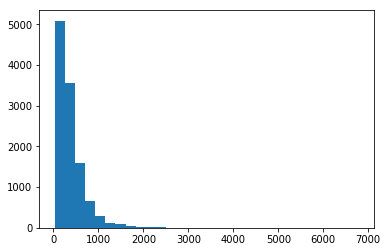

 Cases above 3000 patients:  3
Cases above 3000 Discharged patients, accepted as outliers and removed from the data set


In [24]:
plt.hist(df['Number of Discharges'], bins=30)
plt.show()

print(' Cases above 3000 patients: ', df[df['Number of Discharges'] > 3000]['Number of Discharges'].count())

# Recode these cases when you have time

print('Cases above 3000 Discharged patients, accepted as outliers and removed from the data set')

#df = df[df['Number of Discharges'] < 3000]
#plt.hist(df['Number of Discharges'], bins=30)
#plt.show()

In [25]:
print('Overall excess ratio is:', round(df[df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()/df[df['Excess Readmission Ratio'] < 1]['Excess Readmission Ratio'].count(),3))

Overall excess ratio is: 1.071


In [26]:
print('Whole data success failure calculations with CMS limits')

print('Overall success rate: ', round(df[df['Excess Readmission Ratio'] <= 0.95]['Excess Readmission Ratio'].count()/df['Excess Readmission Ratio'].count(),2))

print('Overall failure rate: ', round(df[df['Excess Readmission Ratio'] >= 1.15]['Excess Readmission Ratio'].count()/df['Excess Readmission Ratio'].count(),2))

print('Overall success ratio: ', round(df[df['Excess Readmission Ratio'] <= 0.95]['Excess Readmission Ratio'].count()/df[df['Excess Readmission Ratio'] >= 1.15]['Excess Readmission Ratio'].count(),2))

Whole data success failure calculations with CMS limits
Overall success rate:  0.24
Overall failure rate:  0.05
Overall success ratio:  4.44


In [27]:
print('Whole data success/failure calculations based on single success/failure point [1.00]')

print('Overall success rate: ', round(df[df['Excess Readmission Ratio'] < 1]['Excess Readmission Ratio'].count()/df['Excess Readmission Ratio'].count(),2))

print('Overall failure rate: ', round(df[df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()/df['Excess Readmission Ratio'].count(),2))

print('Overall success ratio: ', round(df[df['Excess Readmission Ratio'] < 1]['Excess Readmission Ratio'].count()/df[df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count(),2))

Whole data success/failure calculations based on single success/failure point [1.00]
Overall success rate:  0.48
Overall failure rate:  0.52
Overall success ratio:  0.93


In [62]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Realrate
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,48.00
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,44.44
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,42.86
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,37.93
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,43.33


In [68]:
newdf = df.drop(['Hospital Name', 'Provider Number', 'Measure Name', 'Start Date', 'End Date'], axis=1)

In [71]:
newdf = newdf.sort_index()

In [97]:
newdf.head()

,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Realrate
0,WI,242,1.9095,10.8,5.6,38.0,15.70
1,DC,247,1.7521,9.2,5.3,33.0,13.36
2,SC,586,1.5836,7.6,4.8,53.0,9.04
3,IL,965,1.5760,9.0,5.7,95.0,9.84
4,TX,149,1.5308,8.2,5.4,20.0,13.42


In [98]:
newdf.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Realrate
count,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000
mean,365.466209,1.007504,17.984292,17.865695,63.633731,18.233711
std,308.754590,0.091964,5.487651,5.240749,59.540296,6.415243
min,25.000000,0.549500,2.700000,3.900000,11.000000,1.780000
25%,160.000000,0.952600,16.300000,16.600000,24.000000,15.060000
50%,282.000000,1.003500,19.000000,19.000000,45.000000,18.880000
75%,474.000000,1.058100,21.500000,21.400000,82.000000,22.330000
max,6793.000000,1.909500,32.800000,28.000000,879.000000,48.000000


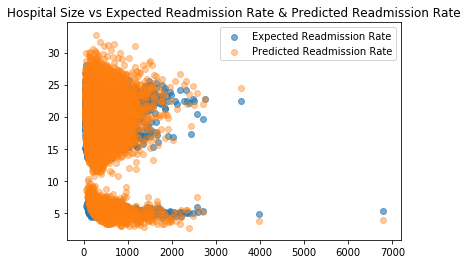

In [87]:
plt.scatter(x=newdf['Number of Discharges'], y=newdf['Expected Readmission Rate'], alpha=.6)
plt.scatter(x=newdf['Number of Discharges'], y=newdf['Predicted Readmission Rate'], alpha=.4)
plt.title('Hospital Size vs Expected Readmission Rate & Predicted Readmission Rate')
plt.legend()
plt.show()

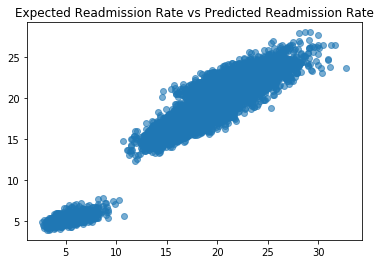

In [89]:
plt.scatter(x=newdf['Predicted Readmission Rate'], y=newdf['Expected Readmission Rate'], alpha=.6)
plt.title('Expected Readmission Rate vs Predicted Readmission Rate')
plt.show()

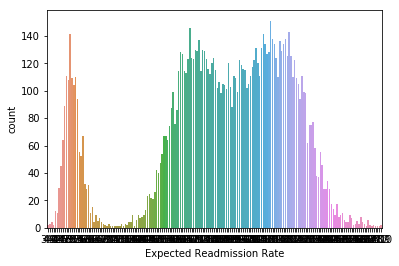

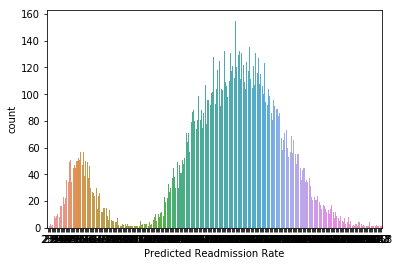

In [95]:
import seaborn as sns

sns.countplot(newdf['Expected Readmission Rate'])
plt.show()

sns.countplot(newdf['Predicted Readmission Rate'])
plt.show()

In [36]:
import scipy.stats as stats

stats.pearsonr(df['Predicted Readmission Rate'], df['Expected Readmission Rate'])

(0.9654200649253498, 0.0)

In [57]:
#real discharge/readmission rate

df.Realrate = round(df['Number of Readmissions']/df['Number of Discharges']*100, 2)

In [58]:
df.Realrate.mean()

18.23371140297456

In [59]:
df.Realrate.describe()

count    11497.000000
mean        18.233711
std          6.415243
min          1.780000
25%         15.060000
50%         18.880000
75%         22.330000
max         48.000000
Name: Realrate, dtype: float64

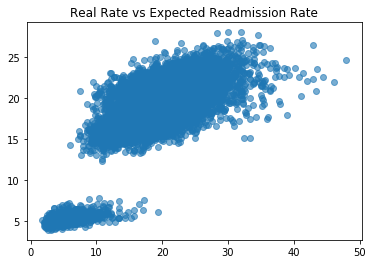

In [107]:
plt.scatter(x=newdf['Realrate'], y=newdf['Expected Readmission Rate'], alpha=.6)
plt.title('Real Rate vs Expected Readmission Rate')
plt.show()

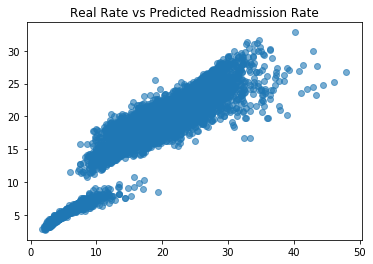

In [105]:
plt.scatter(x=newdf['Realrate'], y=newdf['Predicted Readmission Rate'], alpha=.6)
plt.title('Real Rate vs Predicted Readmission Rate')
plt.show()

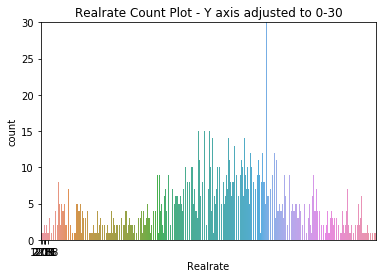

In [104]:
sns.countplot(newdf['Realrate'])
plt.ylim([0, 30])
plt.title('Realrate Count Plot - Y axis adjusted to 0-30')
plt.xticks([0, 10, 20, 30, 30, 50])
plt.show()

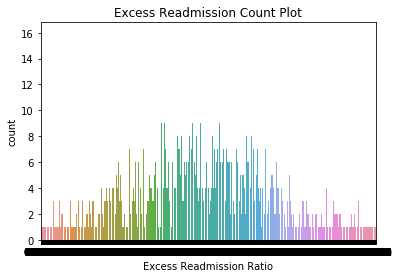

In [103]:
sns.countplot(newdf['Excess Readmission Ratio'])
plt.title('Excess Readmission Count Plot')
plt.show()

In [120]:
df1 = newdf[newdf['Expected Readmission Rate'] < 10]
df2 = newdf[newdf['Expected Readmission Rate'] >= 10]

df1.head()

,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Realrate,Realratio
0,WI,242,1.9095,10.8,5.6,38.0,15.70,2.803571
1,DC,247,1.7521,9.2,5.3,33.0,13.36,2.520755
2,SC,586,1.5836,7.6,4.8,53.0,9.04,1.883333
3,IL,965,1.5760,9.0,5.7,95.0,9.84,1.726316
4,TX,149,1.5308,8.2,5.4,20.0,13.42,2.485185


In [121]:
df2.head()

,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Realrate,Realratio
35,KY,281,1.3892,32.8,23.6,113.0,40.21,1.703814
54,KY,287,1.3462,25.3,18.8,95.0,33.10,1.760638
74,NY,622,1.3170,30.4,23.0,206.0,33.12,1.440000
75,NJ,553,1.3150,31.2,23.8,190.0,34.36,1.443697
110,TN,415,1.2787,20.8,16.2,101.0,24.34,1.502469


In [122]:
newdf['Realratio'] = newdf.Realrate/newdf['Expected Readmission Rate']

In [123]:
newdf.head()

,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Realrate,Realratio
0,WI,242,1.9095,10.8,5.6,38.0,15.70,2.803571
1,DC,247,1.7521,9.2,5.3,33.0,13.36,2.520755
2,SC,586,1.5836,7.6,4.8,53.0,9.04,1.883333
3,IL,965,1.5760,9.0,5.7,95.0,9.84,1.726316
4,TX,149,1.5308,8.2,5.4,20.0,13.42,2.485185


In [124]:
newdf['Excess Readmission Ratio'].describe()

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

In [125]:
newdf.Realratio.describe()

count    11497.000000
mean         1.024595
std          0.219125
min          0.349020
25%          0.887619
50%          1.007884
75%          1.136087
max          3.163934
Name: Realratio, dtype: float64

In [126]:
# Is there a difference between expected and real ratios.
stats.ttest_ind(newdf['Excess Readmission Ratio'], newdf.Realratio)

Ttest_indResult(statistic=-7.711751244973753, pvalue=1.291253338365418e-14)

In [ ]:
# There is a statistical meaningful difference between expected and real excess ratio. 
# The statistic used for comparison and the report seems different from the real situation. 

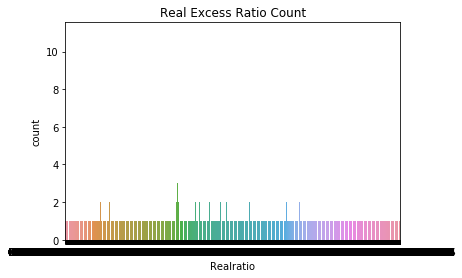

In [127]:
sns.countplot(newdf.Realratio)
plt.title('Real Excess Ratio Count')
plt.show()

In [128]:
print(df1['Excess Readmission Ratio'].describe())
print(df2['Excess Readmission Ratio'].describe())

count    1371.000000
mean        1.027759
std         0.169775
min         0.549500
25%         0.909350
50%         1.023100
75%         1.132800
max         1.909500
Name: Excess Readmission Ratio, dtype: float64
count    10126.000000
mean         1.004761
std          0.075096
min          0.699700
25%          0.955300
50%          1.002500
75%          1.053000
max          1.389200
Name: Excess Readmission Ratio, dtype: float64


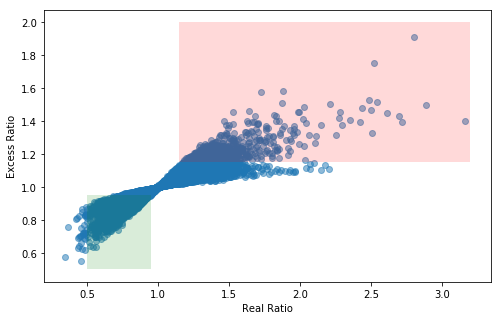

In [155]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=newdf.Realratio, y=newdf['Excess Readmission Ratio'], alpha=0.5)


ax.fill_between([1.15, 3.2], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([0.5, 0.95], .5, .95, facecolor='green', alpha = .15, interpolate=True)

plt.xlabel('Real Ratio')
plt.ylabel('Excess Ratio')
plt.show()


In [142]:
print('Excess Ratio Red Zone Count')
print(newdf[newdf['Excess Readmission Ratio'] > 1.15].count())
print(' ')
print('Real Ratio Red Zone Count')
print(newdf[newdf.Realratio > 1.15].count())
print(' ')
print('Excess Ratio Green Zone Count')
print(newdf[newdf['Excess Readmission Ratio'] < 0.95].count())
print(' ')
print('Real Ratio Green Zone Count')
print(newdf[newdf.Realratio < 0.95].count())



Excess Ratio Red Zone Count
State                         619
Number of Discharges          619
Excess Readmission Ratio      619
Predicted Readmission Rate    619
Expected Readmission Rate     619
Number of Readmissions        619
Realrate                      619
Realratio                     619
dtype: int64
 
Real Ratio Red Zone Count
State                         2615
Number of Discharges          2615
Excess Readmission Ratio      2615
Predicted Readmission Rate    2615
Expected Readmission Rate     2615
Number of Readmissions        2615
Realrate                      2615
Realratio                     2615
dtype: int64
 
Excess Ratio Green Zone Count
State                         2749
Number of Discharges          2749
Excess Readmission Ratio      2749
Predicted Readmission Rate    2749
Expected Readmission Rate     2749
Number of Readmissions        2749
Realrate                      2749
Realratio                     2749
dtype: int64
 
Real Ratio Green Zone Count
State      

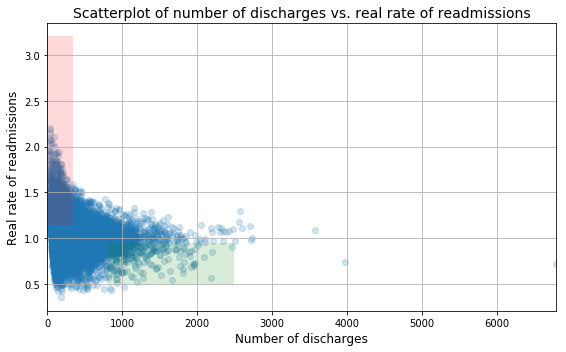

In [160]:
x = [a for a in newdf['Number of Discharges'][81: -3]]
y = list(newdf.Realratio[81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 3.2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Real rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. real rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()